## **Data collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/IOT23

/content/drive/MyDrive/IOT23


In [ ]:
import os
import pandas as pd

In [ ]:
list_file_malware = ["CTU-IoT-Malware-Capture-8-1", #Hakai
                     "CTU-IoT-Malware-Capture-1-1", #Hide and Seek
                     "CTU-IoT-Malware-Capture-34-1"] #Mirai
list_file_benign = ["CTU-Honeypot-Capture-4-1", "CTU-Honeypot-Capture-5-1", "CTU-Honeypot-Capture-7-1"]
list_all_file = list_file_malware + list_file_benign

In [ ]:
# Define field name
column_names = ['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service', 'duration',
                'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
                'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents', 'label', 'detailed-label']
# Creat dataframe
data = pd.DataFrame()
for file_path in list_all_file:
    PATH = file_path + "/bro/conn.log.labeled"
    # Read file into DataFrame
    data =  pd.concat([data, pd.read_csv(PATH, sep='\x09|   ', skiprows = 8, header=None, engine= 'python', na_values='-')])

data.columns = column_names

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044258 entries, 0 to 130
Data columns (total 23 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1044258 non-null  object 
 1   uid             1044258 non-null  object 
 2   id.orig_h       1044255 non-null  object 
 3   id.orig_p       1044252 non-null  float64
 4   id.resp_h       1044252 non-null  object 
 5   id.resp_p       1044252 non-null  float64
 6   proto           1044252 non-null  object 
 7   service         6325 non-null     object 
 8   duration        223644 non-null   float64
 9   orig_bytes      223644 non-null   float64
 10  resp_bytes      223644 non-null   float64
 11  conn_state      1044252 non-null  object 
 12  local_orig      0 non-null        float64
 13  local_resp      0 non-null        float64
 14  missed_bytes    1044252 non-null  float64
 15  history         1026696 non-null  object 
 16  orig_pkts       1044252 non-null  float64
 17

In [ ]:
data.nunique()

,0
ts,1044253
uid,1044258
id.orig_h,15041
id.orig_p,28493
id.resp_h,597312
id.resp_p,65427
proto,3
service,6
duration,24076
orig_bytes,359


## **Data preprocessing**

In [ ]:
#Drop some feature are not important ( explain in report)
data = data.drop(data[data['ts'] == "#close"].index)
data = data.drop(['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p', 'local_orig', 'local_resp', 'tunnel_parents'], axis= 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044237 entries, 0 to 129
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   proto           1044237 non-null  object 
 1   service         6323 non-null     object 
 2   duration        223637 non-null   float64
 3   orig_bytes      223637 non-null   float64
 4   resp_bytes      223637 non-null   float64
 5   conn_state      1044237 non-null  object 
 6   missed_bytes    1044237 non-null  float64
 7   history         1026681 non-null  object 
 8   orig_pkts       1044237 non-null  float64
 9   orig_ip_bytes   1044237 non-null  float64
 10  resp_pkts       1044237 non-null  float64
 11  resp_ip_bytes   1044237 non-null  float64
 12  label           1044237 non-null  object 
 13  detailed-label  568909 non-null   object 
dtypes: float64(8), object(6)
memory usage: 119.5+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
#Encode some feature from object (str) to number label
encoder = LabelEncoder()
data['proto'] = data['proto'].astype(str)
data['proto'] = encoder.fit_transform(data['proto'])

In [ ]:
encoder = LabelEncoder()
data['conn_state'] = data['conn_state'].astype(str)
data['conn_state'] = encoder.fit_transform(data['conn_state'])

In [ ]:
encoder = LabelEncoder()
data['service'] = data['service'].astype(str)
data['service'] = encoder.fit_transform(data['service'])

In [ ]:
encoder = LabelEncoder()
data['history'] = data['history'].astype(str)
data['history'] = encoder.fit_transform(data['history'])

In [ ]:
data['label'] = data['label'].replace(['benign', 'Benign'], 0)
data['label'] = data['label'].replace('Malicious', 1)

<ipython-input-62-dbdd822209cd>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace('Malicious', 1)


In [ ]:
#fill missing data by median
median_duration = data["duration"].median()
data["duration"].fillna(median_duration, inplace=True)

<ipython-input-63-a402ae7dbc15>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["duration"].fillna(median_duration, inplace=True)


In [ ]:
#fill missing data by median
median_orig_bytes = data["orig_bytes"].median()
data["orig_bytes"].fillna(median_orig_bytes, inplace=True)

<ipython-input-64-b9a7591cef06>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["orig_bytes"].fillna(median_orig_bytes, inplace=True)


In [ ]:
#fill missing data by median
median_resp_bytes = data["resp_bytes"].median()
data["resp_bytes"].fillna(median_resp_bytes, inplace=True)

<ipython-input-65-c9bc95a6a3ca>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["resp_bytes"].fillna(median_resp_bytes, inplace=True)


In [ ]:
data.describe()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
count,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06
mean,1.379044e+00,3.988539e+00,3.363766e+00,8.415869e+01,3.338170e+02,5.866604e+00,6.672527e-02,2.357107e+01,1.753745e+00,1.759299e+02,4.031920e-01,3.547846e+02,5.448083e-01
std,5.186468e-01,1.611878e-01,1.180364e+02,7.408330e+04,3.293380e+05,1.218520e+00,1.781666e+01,2.688105e+01,1.245005e+02,7.488757e+04,2.345245e+02,3.421636e+05,4.979884e-01
min,0.000000e+00,0.000000e+00,2.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,4.000000e+00,2.998797e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,4.000000e+00,2.998797e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,3.000000e+01,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.000000e+00,4.000000e+00,2.998797e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,3.000000e+01,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
max,2.000000e+00,6.000000e+00,7.884033e+04,7.554662e+07,3.365164e+08,1.200000e+01,7.363000e+03,1.770000e+02,1.236570e+05,7.606306e+07,2.394840e+05,3.496187e+08,1.000000e+00


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

columns_to_exclude = ['label', 'proto', 'conn_state', 'history', 'service', 'detailed-label']  # Columns to exclude

# Get the columns to scale (columns not in 'columns_to_exclude')
columns_to_scale = [col for col in data.columns if col not in columns_to_exclude]

# Initialize scaler
scaler = MaxAbsScaler()

# Apply scaler to the columns to be scaled
data_scaled = data.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Print the scaled DataFrame
print(data_scaled.head())

   proto  service      duration    orig_bytes    resp_bytes  conn_state  \
0      2        4  6.963441e-08  6.353692e-07  1.426379e-07          10   
1      2        4  2.208261e-08  6.353692e-07  1.426379e-07          10   
2      2        4  5.701397e-08  6.353692e-07  1.426379e-07          10   
3      2        4  8.863484e-08  6.353692e-07  1.426379e-07          10   
4      2        4  1.886091e-08  6.353692e-07  1.426379e-07          10   

   missed_bytes  history  orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes  \
0           0.0        9   0.000008   9.991710e-07   0.000004   2.173797e-07   
1           0.0        9   0.000008   9.991710e-07   0.000004   2.173797e-07   
2           0.0        9   0.000008   9.991710e-07   0.000004   2.173797e-07   
3           0.0        9   0.000008   9.991710e-07   0.000004   2.173797e-07   
4           0.0        9   0.000008   9.991710e-07   0.000004   2.173797e-07   

   label detailed-label  
0      0            NaN  
1      0        

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044237 entries, 0 to 129
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   proto           1044237 non-null  int64  
 1   service         1044237 non-null  int64  
 2   duration        1044237 non-null  float64
 3   orig_bytes      1044237 non-null  float64
 4   resp_bytes      1044237 non-null  float64
 5   conn_state      1044237 non-null  int64  
 6   missed_bytes    1044237 non-null  float64
 7   history         1044237 non-null  int64  
 8   orig_pkts       1044237 non-null  float64
 9   orig_ip_bytes   1044237 non-null  float64
 10  resp_pkts       1044237 non-null  float64
 11  resp_ip_bytes   1044237 non-null  float64
 12  label           1044237 non-null  int64  
 13  detailed-label  568909 non-null   object 
dtypes: float64(8), int64(5), object(1)
memory usage: 119.5+ MB


In [ ]:
data_binary_classification = data_scaled.copy()
data_binary_classification = data_binary_classification.drop(['detailed-label'], axis= 1)

In [ ]:
# Prepare data for clustering with 2 clusters (benign / malicious)
# Step 1: Separate rows with 'C&C' or 'DDoS' detailed labels
important_rows = data_scaled[
    (data_scaled['detailed-label'] == 'C&C') |
    (data_scaled['detailed-label'] == 'DDoS')
]

# Step 2: Exclude important rows from the rest of the data
remaining_data = data_scaled.drop(important_rows.index)

# Step 3: Calculate the remaining rows to sample to reach 100,000 total rows
remaining_sample_size = 100000 - len(important_rows)

# Step 4: Perform stratified sampling on the remaining data
from sklearn.model_selection import train_test_split

sampled_remaining_data, _ = train_test_split(
    remaining_data,
    test_size=(len(remaining_data) - remaining_sample_size) / len(remaining_data),
    stratify=remaining_data['label'],
    random_state=42
)

# Step 5: Combine the important rows with the sampled data
first_sampled_data = pd.concat([important_rows, sampled_remaining_data])

# Verify the class distribution and size
print(f"Total rows: {len(first_sampled_data)}")
print(first_sampled_data['label'].value_counts())
print(first_sampled_data['detailed-label'].value_counts())

first_clustering_data = first_sampled_data.drop(['label', 'detailed-label'], axis=1)

Total rows: 100000
label
1    67044
0    32956
Name: count, dtype: int64
detailed-label
PartOfAHorizontalPortScan    37720
C&C                          14931
DDoS                         14393
Name: count, dtype: int64


In [ ]:
# Prepare data for clustering attack types based on the detailed-label
# Step 1: Filter the dataset to keep only rows with label '1' (malicious)
malicious_subset = first_sampled_data[first_sampled_data['label'] == 1]

# Step 2: Verify the extracted malicious dataset
print(f"Total rows: {len(malicious_subset)}")
print("Detailed label distribution in the malicious dataset:")
print(malicious_subset['detailed-label'].value_counts())

malicious_subset['detailed-label'] = malicious_subset['detailed-label'].replace('PartOfAHorizontalPortScan', 0)
malicious_subset['detailed-label'] = malicious_subset['detailed-label'].replace('C&C', 1)
malicious_subset['detailed-label'] = malicious_subset['detailed-label'].replace('DDoS', 2)

malicious_clustering = malicious_subset.drop(['label', 'detailed-label'], axis=1)

Total rows: 67044
Detailed label distribution in the malicious dataset:
detailed-label
PartOfAHorizontalPortScan    37720
C&C                          14931
DDoS                         14393
Name: count, dtype: int64


<ipython-input-84-40bb589f54ff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malicious_subset['detailed-label'] = malicious_subset['detailed-label'].replace('PartOfAHorizontalPortScan', 0)
<ipython-input-84-40bb589f54ff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malicious_subset['detailed-label'] = malicious_subset['detailed-label'].replace('C&C', 1)
<ipython-input-84-40bb589f54ff>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To ret

## **Data analysis & visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='label'>

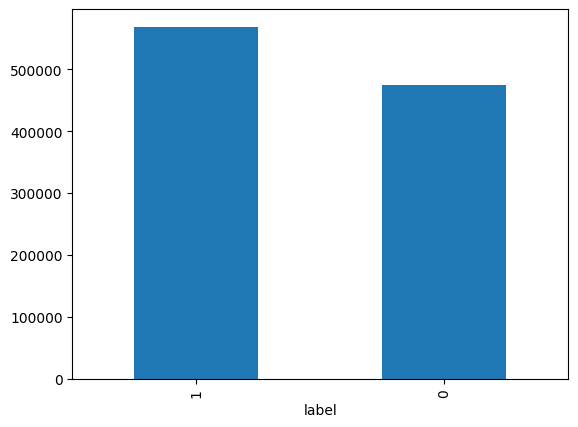

In [ ]:
data["label"].value_counts().plot(kind="bar")

detailed-label
PartOfAHorizontalPortScan    539585
C&C                           14931
DDoS                          14393
Name: count, dtype: int64


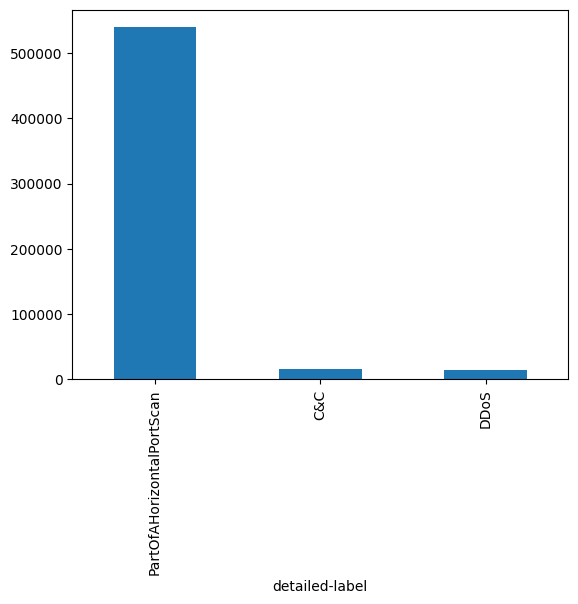

In [ ]:
data["detailed-label"].value_counts().plot(kind="bar")
print(data["detailed-label"].value_counts())

In [ ]:
data_binary_classification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044237 entries, 0 to 129
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   proto          1044237 non-null  int64  
 1   service        1044237 non-null  int64  
 2   duration       1044237 non-null  float64
 3   orig_bytes     1044237 non-null  float64
 4   resp_bytes     1044237 non-null  float64
 5   conn_state     1044237 non-null  int64  
 6   missed_bytes   1044237 non-null  float64
 7   history        1044237 non-null  int64  
 8   orig_pkts      1044237 non-null  float64
 9   orig_ip_bytes  1044237 non-null  float64
 10  resp_pkts      1044237 non-null  float64
 11  resp_ip_bytes  1044237 non-null  float64
 12  label          1044237 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 111.5 MB


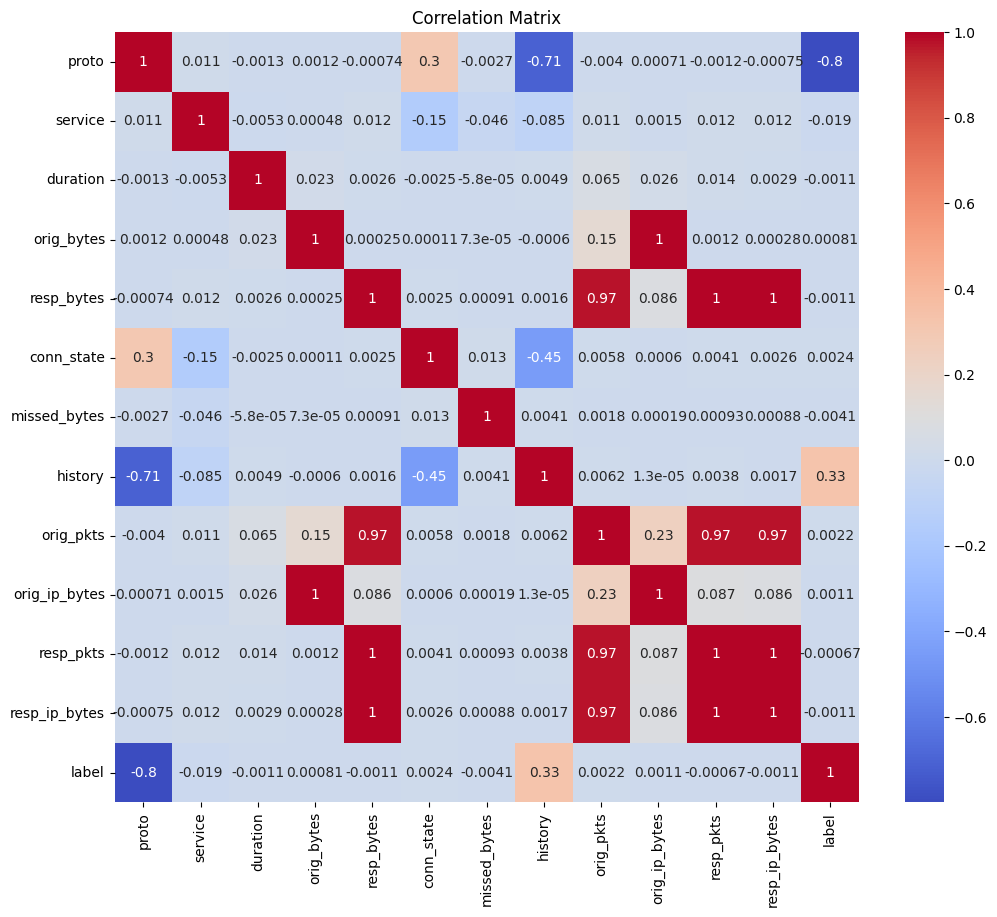

In [ ]:
# Calculate the correlation matrix
corr_matrix = data_binary_classification.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


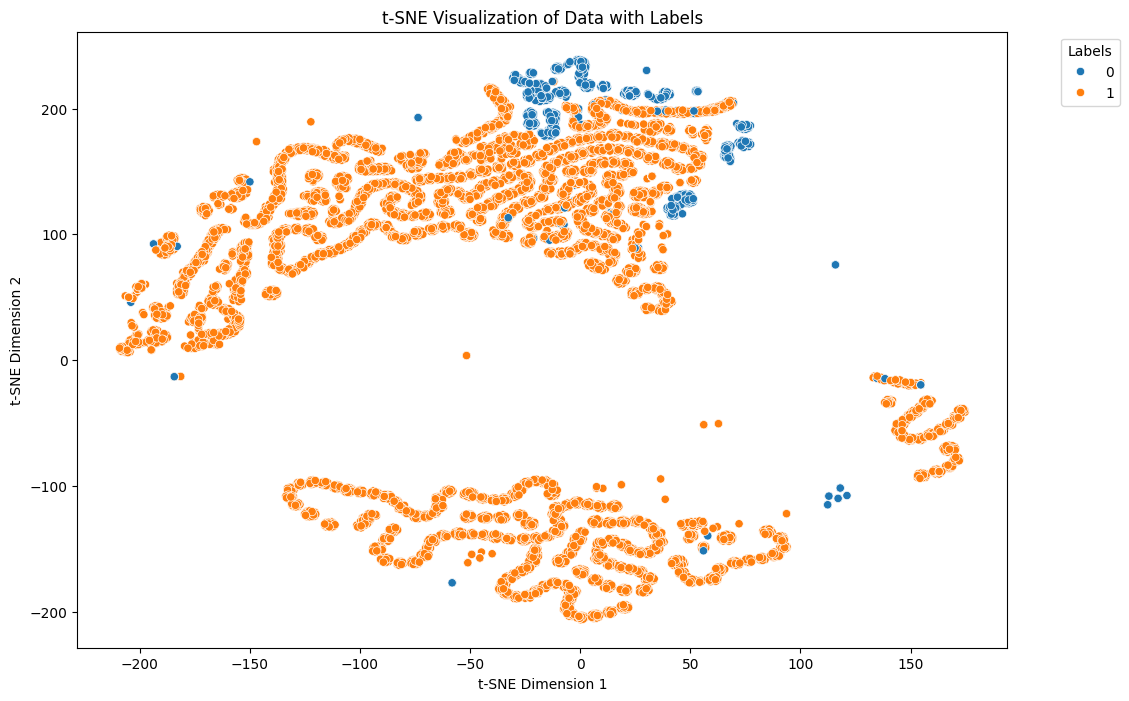

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

data_scaled_reset = first_sampled_data.reset_index(drop=True)
data_sample = data_scaled_reset.drop(['label', 'detailed-label'], axis=1)
# data_sample_detailed_label = data_sample.index.map(first_sampled_data['label'])
tsne_result = tsne.fit_transform(data_sample)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    hue=first_sampled_data['label'],
    palette='tab10',
    legend='full'
)
plt.title('t-SNE Visualization of Data with Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


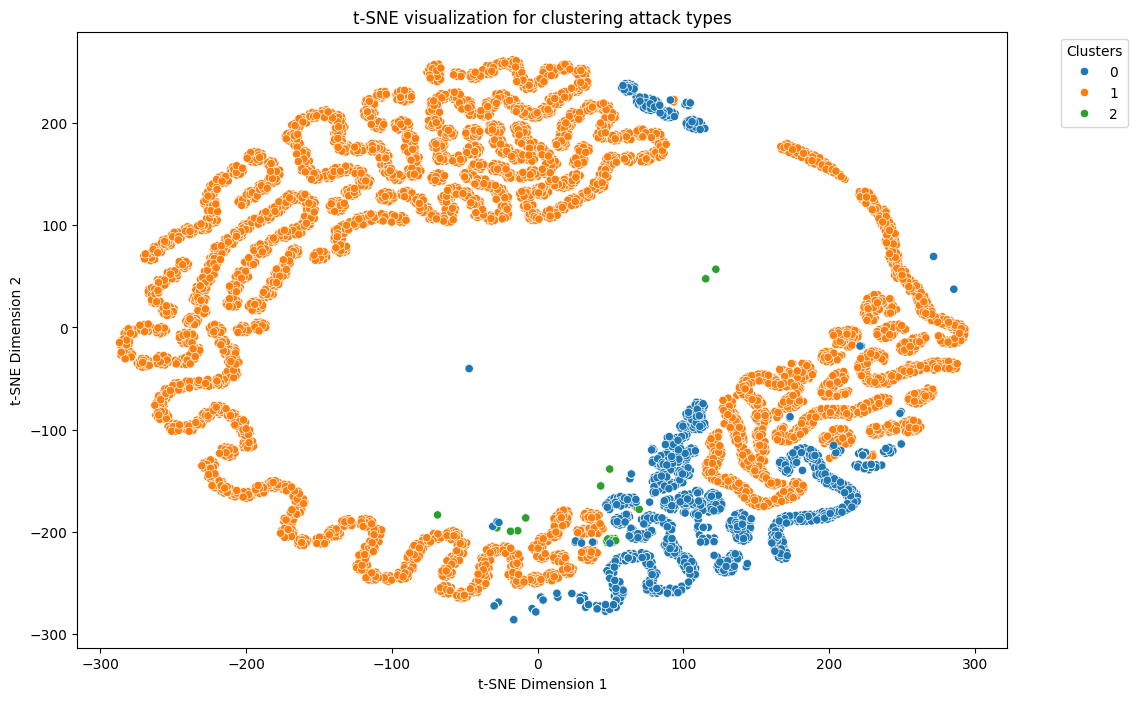

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(malicious_clustering)

# Visualize the results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    hue=malicious_subset['detailed-label'],
    palette='tab10',
    legend='full'
)
plt.title('t-SNE visualization for clustering attack types')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Clusters')
plt.show()

In [ ]:
data_binary_classification.describe()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
count,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06,1.044237e+06
mean,1.379044e+00,3.988539e+00,4.266555e-05,1.113997e-06,9.919784e-07,5.866604e+00,9.062240e-06,2.357107e+01,1.418233e-05,2.312948e-06,1.683586e-06,1.014776e-06,5.448083e-01
std,5.186468e-01,1.611878e-01,1.497157e-03,9.806302e-04,9.786685e-04,1.218520e+00,2.419755e-03,2.688105e+01,1.006822e-03,9.845459e-04,9.792908e-04,9.786764e-04,4.979884e-01
min,0.000000e+00,0.000000e+00,2.536773e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,4.000000e+00,3.803633e-05,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,5.000000e+00,8.086885e-06,5.258795e-07,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,4.000000e+00,3.803633e-05,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,3.000000e+01,8.086885e-06,7.888192e-07,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.000000e+00,4.000000e+00,3.803633e-05,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,3.000000e+01,8.086885e-06,7.888192e-07,0.000000e+00,0.000000e+00,1.000000e+00
max,2.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01,1.000000e+00,1.770000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## **Classification**

In [ ]:
from sklearn.feature_selection import  mutual_info_classif
x = data_binary_classification.drop( ['label'], axis=1)
y = data_binary_classification['label']
mi_scores = mutual_info_classif(x, y)


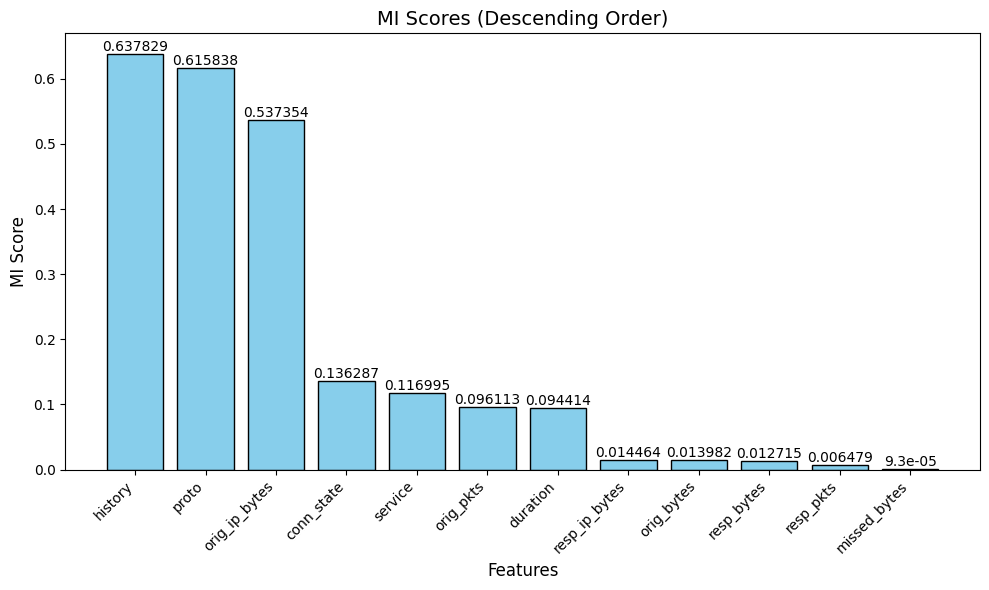

In [ ]:
# Combine column names and MI scores into a list and sort in descending order by MI score
sorted_features = sorted(zip(x.columns, mi_scores), key=lambda x: x[1], reverse=True)

# Separate column names and MI scores
features = [feature for feature, score in sorted_features]
scores = [score for feature, score in sorted_features]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(features, scores, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Features', fontsize=12)
plt.ylabel('MI Score', fontsize=12)
plt.title('MI Scores (Descending Order)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Print MI score values on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the MI score value of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 6), ha='center', va='bottom', fontsize=10)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

In [ ]:
x = x.drop(['resp_pkts', 'missed_bytes'], axis=1)

In [ ]:
#Split dataset
from sklearn.model_selection import train_test_split
x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.3, random_state=42)
x_test , x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.5, random_state=42)

### XGBoost

In [ ]:
!pip uninstall scikit-learn -y

!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [ ]:
import sklearn
print(sklearn.__version__)


1.5.2


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [5, 7],
    'learning_rate': [0.001, 0.005, 0.01],
    'n_estimators': [128, 256, 512]
}

# Create the XGBoost model
xgb_clf = XGBClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1',  # Or 'accuracy', 'precision', 'recall'
    cv=5,          # Cross-validation k=5
    verbose=1
)

# Search for the best parameters
grid_search.fit(x_train, y_train)

# Output the best parameters and F1-Score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1-Score: ", grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found:  {'learning_rate': 0.005, 'max_depth': 7, 'n_estimators': 512}
Best F1-Score:  0.9630510571295625


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Create the XGBoost model
xgb_clf = XGBClassifier(
    max_depth=7,          # Maximum depth of the tree
    learning_rate=0.005,  # Learning rate
    n_estimators=512,     # Number of trees
)

# Train the model
xgb_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_clf.predict(x_test_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_val, y_pred)
precision = precision_score(y_test_val, y_pred, average='binary')
recall = recall_score(y_test_val, y_pred, average='binary')
f1 = f1_score(y_test_val, y_pred, average='binary')

# Print the results
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

Accuracy: 95.84%
Precision: 92.90%
Recall: 99.99%
F1-Score: 96.31%


### **Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the Naive Bayes model
nb_clf = GaussianNB()

# Train the model
nb_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = nb_clf.predict(x_test_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_val, y_pred)
precision = precision_score(y_test_val, y_pred, average='binary')
recall = recall_score(y_test_val, y_pred, average='binary')
f1 = f1_score(y_test_val, y_pred, average='binary')

# Print the results
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

Accuracy: 94.74%
Precision: 92.71%
Recall: 98.03%
F1-Score: 95.30%




```
# This is formatted as code
```

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=128, random_state=42)
rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(x_test_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_val, y_pred)
precision = precision_score(y_test_val, y_pred, average='binary')
recall = recall_score(y_test_val, y_pred, average='binary')
f1 = f1_score(y_test_val, y_pred, average='binary')

# Print the results
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

Accuracy: 95.80%
Precision: 92.91%
Recall: 99.90%
F1-Score: 96.28%


### **SVM**

In [ ]:
from sklearn import svm

# Initialize the SVM model
svm = svm.SVC()

# Train the model
svm.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(x_test_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_val, y_pred)
precision = precision_score(y_test_val, y_pred, average='binary')
recall = recall_score(y_test_val, y_pred, average='binary')
f1 = f1_score(y_test_val, y_pred, average='binary')

# Print the results
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

Accuracy: 95.78%
Precision: 92.81%
Recall: 99.97%
F1-Score: 96.26%


## **Clustering**

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score, accuracy_score

In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment as linear_assignment
def acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed

    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`

    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    row_ind, col_ind = linear_assignment(w.max() - w)
    return sum([w[row_ind[k], col_ind[k]] for k in range(len(row_ind))]) * 1.0 / y_pred.size

### **K-means**

In [ ]:
from sklearn.cluster import KMeans
# Apply K-means for first dataset
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=42)
kmeans_labels = kmeans.fit_predict(first_clustering_data)

In [ ]:
# Apply K-means for second dataset
n_clusters = malicious_subset['detailed-label'].nunique()
print(f"Number of clusters: {n_clusters}")
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
kmeans_malicious_labels = kmeans.fit_predict(malicious_clustering)

Number of clusters: 3


In [ ]:
# Evaluate Clustering
ari_score_kmeans = adjusted_rand_score(first_sampled_data['label'], kmeans_labels)
print(f"K-means ARI: {ari_score_kmeans:.4f}")

nmi_score_kmeans = normalized_mutual_info_score(first_sampled_data['label'], kmeans_labels)
print(f"K-means NMI: {nmi_score_kmeans:.4f}")

y_true = first_sampled_data['label'].reset_index(drop=True)
y_pred = kmeans_labels

accuracy = acc(y_true, y_pred)
print(f"K-means Accuracy: {accuracy:.4f}")

db_index = davies_bouldin_score(first_clustering_data, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

silhouette_score_kmeans = silhouette_score(first_clustering_data, kmeans_labels)
print(f"K-means Silhouette Score: {silhouette_score_kmeans:.4f}")

K-means ARI: 0.0009
K-means NMI: 0.0000
K-means Accuracy: 0.6590
Davies-Bouldin Index: 0.3139
K-means Silhouette Score: 0.8864


In [ ]:
# Evaluate Clustering
ari_score_kmeans = adjusted_rand_score(malicious_subset['detailed-label'], kmeans_malicious_labels)
print(f"K-means ARI: {ari_score_kmeans:.4f}")

nmi_score_kmeans = normalized_mutual_info_score(malicious_subset['detailed-label'], kmeans_malicious_labels)
print(f"K-means NMI: {nmi_score_kmeans:.4f}")

y_true = malicious_subset['detailed-label'].reset_index(drop=True)
y_pred = kmeans_malicious_labels
accuracy_kmeans = acc(y_true, y_pred)
print(f"K-means Accuracy: {accuracy_kmeans:.4f}")

db_index = davies_bouldin_score(malicious_clustering, kmeans_malicious_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

silhouette_score_kmeans = silhouette_score(malicious_clustering, kmeans_malicious_labels)
print(f"K-means Silhouette Score: {silhouette_score_kmeans:.4f}")

K-means ARI: 0.5289
K-means NMI: 0.6283
K-means Accuracy: 0.7889
Davies-Bouldin Index: 0.1149
K-means Silhouette Score: 0.9887


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


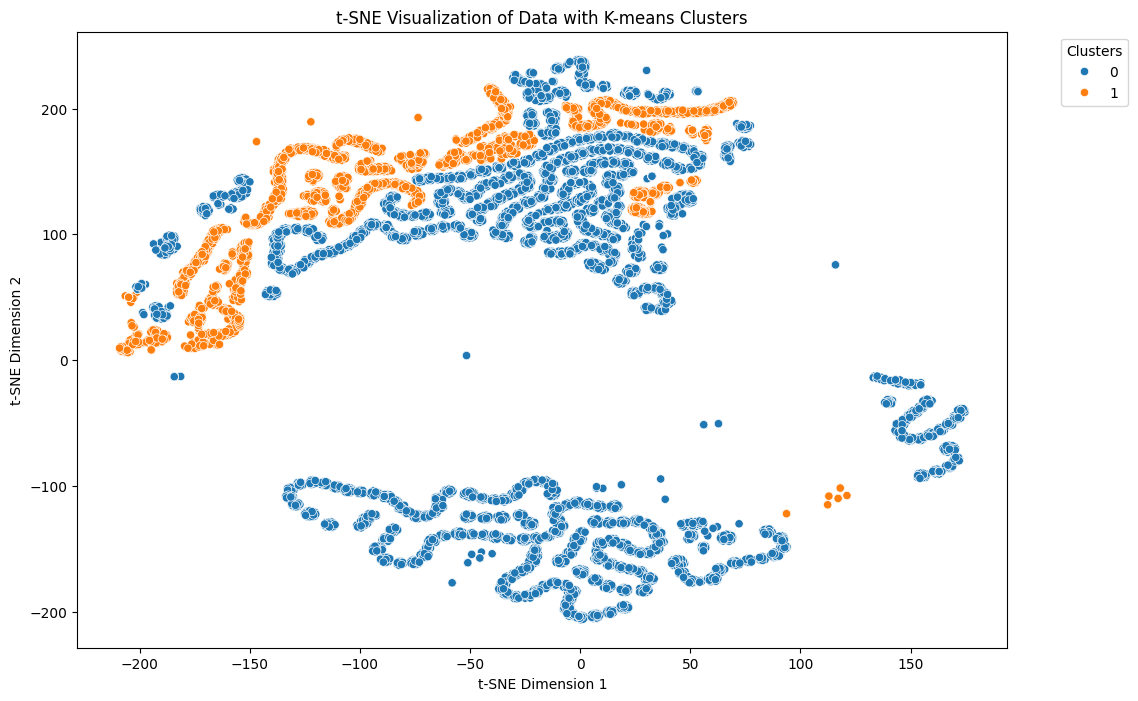

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(first_clustering_data)

# Visualize the results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    hue=kmeans_labels,
    palette='tab10',
    legend='full'
)
plt.title('t-SNE Visualization of Data with K-means Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


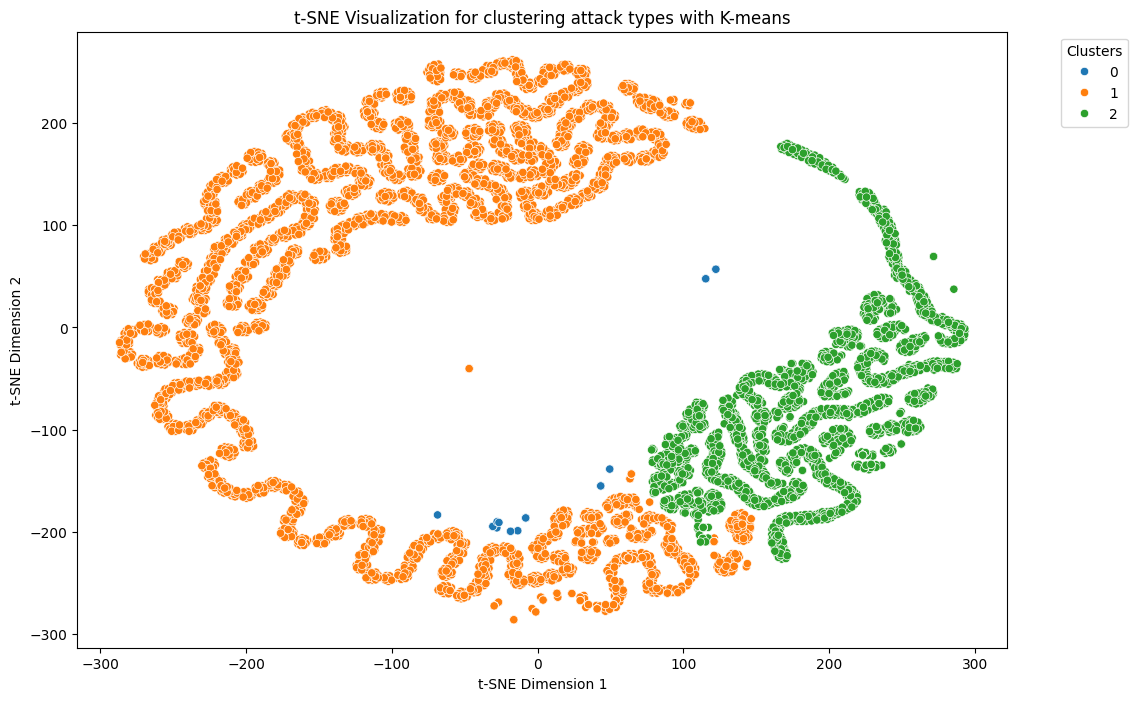

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(malicious_clustering)

# Visualize the results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    hue=kmeans_malicious_labels,
    palette='tab10',
    legend='full'
)
plt.title('t-SNE Visualization for clustering attack types with K-means')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Clusters')
plt.show()


### **Hierchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    davies_bouldin_score,
    silhouette_score
)

# Function to evaluate hierarchical clustering
def evaluate_hierarchical_clustering(data, labels_true, n_clusters, linkage_method):
    print(f"\nHierarchical Clustering with {linkage_method} linkage")

    # Apply Agglomerative Clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    labels_pred = clustering.fit_predict(data)

    # Calculate Evaluation Metrics
    ari = adjusted_rand_score(labels_true, labels_pred)
    nmi = normalized_mutual_info_score(labels_true, labels_pred)
    y_true = labels_true.reset_index(drop=True)
    y_pred = labels_pred
    accuracy = acc(y_true, y_pred)
    db_index = davies_bouldin_score(data, labels_pred)
    silhouette = silhouette_score(data, labels_pred)

    print(f"ARI: {ari:.4f}")
    print(f"NMI: {nmi:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Davies-Bouldin Index: {db_index:.4f}")
    print(f"Silhouette Score: {silhouette:.4f}")

    return labels_pred

In [ ]:
data = first_clustering_data
true_labels = first_sampled_data['label']
n_clusters = 2

In [ ]:
linkage = 'single'
evaluate_hierarchical_clustering(data, true_labels, n_clusters, linkage)


Hierarchical Clustering with single linkage
ARI: -0.0004
NMI: 0.0000
Accuracy: 0.6576
Davies-Bouldin Index: 0.3316
Silhouette Score: 0.8834


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
data = malicious_clustering
true_labels = malicious_subset['detailed-label']
n_clusters = true_labels.nunique()
linkage = 'single'
evaluate_hierarchical_clustering(data, true_labels, n_clusters, linkage)


Hierarchical Clustering with single linkage
ARI: 0.5258
NMI: 0.6243
Accuracy: 0.7870
Davies-Bouldin Index: 0.1225
Silhouette Score: 0.9898


array([2, 2, 2, ..., 2, 2, 2])